In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Train = pd.read_csv('train.csv')
Test = pd.read_csv('test.csv')

In [3]:
Train.tail()
print(Train.shape)

(891, 12)


In [4]:
Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#From the above data set we can drop columns ' Name' and 'Ticket' columns
Train.drop(['Name','Ticket'],axis = 1,inplace=True)

In [8]:
Train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [9]:
Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
Train['Cabin'].isnull().value_counts(normalize=True)

True     0.771044
False    0.228956
Name: Cabin, dtype: float64

In [11]:
#Cabin column invoves more than 77% of total Nan values, we can drop this column
Train.drop(['Cabin'],axis=1,inplace=True)

In [12]:
Train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [13]:
Train.drop(['PassengerId'],axis=1,inplace=True)

In [14]:
Train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


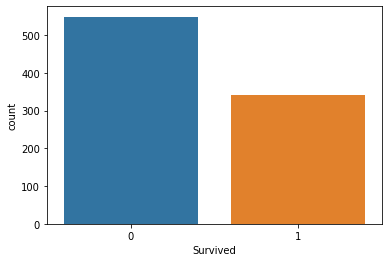

In [15]:
sns.countplot(Train['Survived'])

In [16]:
Train['Survived'].value_counts(normalize=True)
#From below we can see that only 38% of the total passengers survived the scare

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [17]:
#Lets see how many males and females are survived scare
Train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

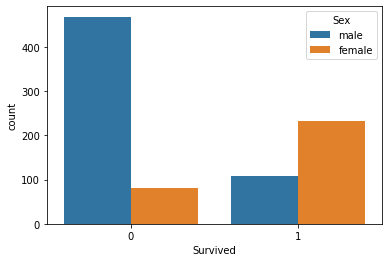

In [18]:
sns.countplot(Train['Survived'],hue=Train['Sex'])

From the above we can see that most Females survived(74%) and and only 18% of mails survived

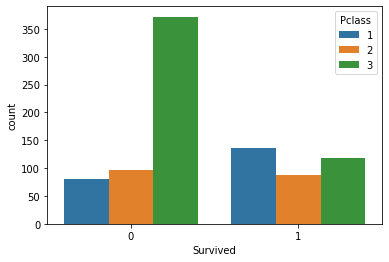

In [19]:
sns.countplot(Train['Survived'],hue=Train['Pclass'])

In [20]:
Train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Surviva; rate is more in Pclass=1(63%) followed by Pclass=2(47%)

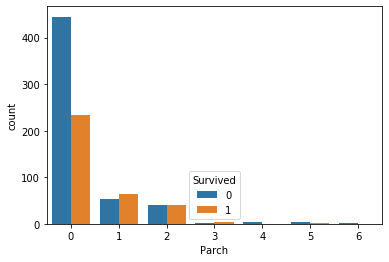

In [21]:
sns.countplot(Train['Parch'],hue = Train['Survived'])

In [22]:
Train.groupby('Parch')['Survived'].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

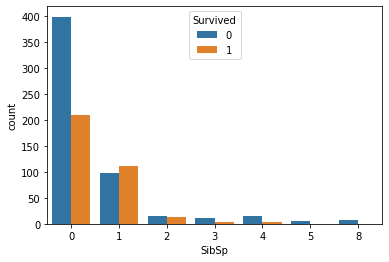

In [23]:
sns.countplot(Train['SibSp'],hue=Train['Survived'])

In [24]:
Train.groupby('SibSp')['Survived'].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [25]:
Train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [26]:
#Age column has most of the Nan values lets impute them
Train[Train['Age'].isnull()]['Pclass'].value_counts()

3    136
1     30
2     11
Name: Pclass, dtype: int64

We can see that out of 177 Nan values, 136 are from passenger class=3 and 30 from Pclass=1 and 11 from Pclass=2

In [27]:
Train[Train['Age'].isnull()]['Sex'].value_counts()

male      124
female     53
Name: Sex, dtype: int64

Most of the missing values are for Male

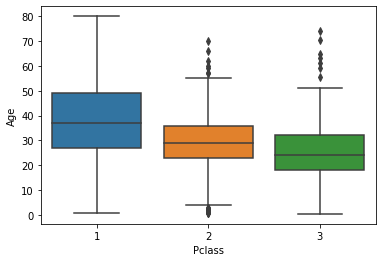

In [28]:
# lets find the mean ages of Pclass1,2,3 with box plot
sns.boxplot(Train['Pclass'],Train['Age'])

In [29]:
Train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [30]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [31]:
Train['Age'] = Train[['Age','Pclass']].apply(impute_age,axis=1)

In [32]:
Train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [33]:
Train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
Train['Embarked'].fillna('S',inplace=True)

In [35]:
Train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [36]:
Train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [37]:
map_sex = {'male' : 0, 'female':1}

In [38]:
Train['Sex']=Train['Sex'].map(map_sex)

In [39]:
Train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [40]:
Train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
map_embark = {'S':3,'C':2,'Q':1}

In [42]:
Train['Embarked'] = Train['Embarked'].map(map_embark)

In [43]:
Train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,3
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,3
3,1,1,1,35.0,1,0,53.1000,3
4,0,3,0,35.0,0,0,8.0500,3


In [44]:
Q_1 = np.percentile(Train['Fare'],25)
Q_1

7.9104

In [45]:
Q_3 = np.percentile(Train['Fare'],75)
Q_3

31.0

In [46]:
IQR = Q_3 - Q_1
IQR

23.0896

In [84]:
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [48]:
y= Train['Survived']
X = Train.drop(['Survived'],axis=1)

In [49]:
#X.head()
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [50]:
X = scale(X)

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [85]:
#reg = LogisticRegression()
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
y_pred = gbk.predict(X_test)
acc_gbk = round(gbk.score(X_train,y_train) * 100, 2)
acc= round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gbk)
print(acc)

91.62
78.48


In [53]:
#reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_pred = reg.predict(X_test)

In [55]:
reg.score(X_train,y_train)

0.811377245508982

In [56]:
reg.score(X_test,y_test)

0.7802690582959642

In [57]:
# So lets import Test dataset from Kaggale
Test_data = pd.read_csv('test.csv')
Test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
Id_Test = Test_data['PassengerId']

In [59]:
#Lets drop the 'PassengerID','Name','Ticket','Cabin' column from the dataset
Test_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace= True)

In [60]:
Test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [61]:
Test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [62]:
Test_data['Age'] = Test_data[['Age','Pclass']].apply(impute_age,axis=1)
Test_data['Age'].isnull().sum()

0

In [63]:
Test_data[Test_data['Fare'].isnull()==True]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,male,60.5,0,0,NaN,S


In [64]:
Test_data.groupby('Pclass')['Fare'].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [65]:
Test_data['Fare'].fillna(12.46,inplace=True)
Test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [66]:
Test_data['Sex']=Test_data['Sex'].map(map_sex)

In [67]:
Test_data['Embarked'] = Test_data['Embarked'].map(map_embark)

In [68]:
Test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,1
1,3,1,47.0,1,0,7.0000,3
2,2,0,62.0,0,0,9.6875,1
3,3,0,27.0,0,0,8.6625,3
4,3,1,22.0,1,1,12.2875,3


In [69]:
Test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [70]:
Test_data = scale(Test_data)

In [86]:
#pred_out = reg.predict(Test_data)
pred_out = gbk.predict(Test_data)


In [87]:
pred_out

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [88]:
new_data = pd.DataFrame(Id_Test, columns=['PassengerId'])
new_data

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [91]:
new_data['Survived'] = pred_out

In [92]:
new_data.to_csv('predictions.csv' , index=False)